Datenvorbereitung
Definitionen von Armut, etc.
Klassifizierung der einzelnen Steps nach Crisp-DM

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

suicide_df = pd.DataFrame()
suicide_df = pd.read_csv('/home/jakob/Uni/data_visualization/Rastetter-Dietrich-Denig/data/suicide_rates.csv') # Quelle: WHO

for column in suicide_df.columns[1:]:
    # Extract point estimates from entries in the column
    suicide_df[column] = suicide_df[column].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)

def process_csv_files(folder_path):
    # Get list of all CSV files in the folder
    file_to_exclude = '1900_2021_DISASTERS.xlsx - emdat data.csv'

    folder_path = '/home/jakob/Uni/data_visualization/Rastetter-Dietrich-Denig/data'

    file_paths = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if file.endswith('.csv') and file != file_to_exclude
    ]



# List to store DataFrames
    dfs = []

    for file_path in file_paths:
        df = pd.read_csv(file_path)

        # Rename columns
        df.rename(columns={'Year(s)': 'Year', 'Time Period': 'Year', 'Reference Area': 'Country or Area',
                           'Observation Value': 'Value', 'Country or territory of origin': 'Country or Area',
                           'Refugees*': 'Value', 'Countries, territories and areas': 'Country or Area'},
                  inplace=True)

        # Filter out rows with year 2101
        df = df[df['Year'] != 2101]

        # Filter rows where 'Sex' column is 'all genders'
        if 'Sex' in df.columns:
            df = df[df['Sex'] == 'All genders']

        # Filter columns
        df = df[['Country or Area', 'Year', 'Value']]

        # Convert data types
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, coerce errors to NaN
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Convert to numeric, coerce errors to NaN

        # Extract the last part of the file path as the column suffix
        file_name = os.path.splitext(os.path.basename(file_path))[0]

        # Create custom column names
        custom_names = [f'{file_name}' if col == 'Value' else col for col in ['Country or Area', 'Year', 'Value']]

        # Rename columns
        df.columns = custom_names
        dfs.append(df)

    # Merge the DataFrames based on 'Country or Area' and 'Year'
    combined_df = dfs[0]
    for df in dfs[1:]:
        combined_df = pd.merge(combined_df, df, on=['Country or Area', 'Year'], how='outer')

    # Regions to exclude
    regions_to_exclude = ['Africa', 'Asia', 'Australia/New Zealand', 'Australia/New Zealand', 'World', 'Eastern Africa',
                          'Eastern Africa', 'Eastern and South-Eastern Asia', 'Eastern Europe', 'High-income countries',
                          'Land-locked Developing Countries (LLDC)', 'Less developed regions, excluding China',
                          'Less developed regions',
                          'Less developed regions, excluding least developed countries',
                          'Small Island Developing States (SIDS)',
                          'No income group available', 'Northern Africa', 'Northern Africa and Western Asia',
                          'Northern America',
                          'Northern Europe', 'Low-income countries', 'Middle-income countries', 'More developed regions',
                          'Middle Africa',
                          'Eastern Asia', 'Soutern Asia', 'Western Europe', 'Upper-middle-income countries',
                          'Lower-middle-income countries',
                          'Europe', 'South-Eastern Asia', 'Southern Europe', 'Southern Asia', 'Southern Africa',
                          'Europe and Northern America',
                          'Central Asia', 'Central America', 'Central and Southern Asia', 'Sub-Saharan Africa',
                          'Least developed countries',
                          'Latin America and the Caribbean', 'Western Africa', 'South America', 'Western Asia']

    # Filter out regions
    filtered_combined_df = combined_df[~combined_df['Country or Area'].isin(regions_to_exclude)]

    return filtered_combined_df

# Call the function with the folder path
folder_path = '/home/jakob/Uni/data_visualization/Rastetter-Dietrich-Denig/data'
result_df = process_csv_files(folder_path)

# Display the result DataFrame
display(result_df)
display(result_df)

,Country or Area,Year,refugees_origin,total_fertility_rate,school_life_expextancy_ISCED_1-8,total_population,suicide_rates,life_expectancy,infant_mortality_rate,GDP_per_capita_constant_dollar_2017
0,Iran (Islamic Rep. of),2021,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iran (Islamic Rep. of),2021,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iran (Islamic Rep. of),2021,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Iran (Islamic Rep. of),2021,12701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Iran (Islamic Rep. of),2021,7046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
139226,West Bank and Gaza,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4786.480236
139227,West Bank and Gaza,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4294.746098
139228,West Bank and Gaza,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3916.925775
139229,West Bank and Gaza,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4047.128488


,Country or Area,Year,refugees_origin,total_fertility_rate,school_life_expextancy_ISCED_1-8,total_population,suicide_rates,life_expectancy,infant_mortality_rate,GDP_per_capita_constant_dollar_2017
0,Iran (Islamic Rep. of),2021,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iran (Islamic Rep. of),2021,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iran (Islamic Rep. of),2021,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Iran (Islamic Rep. of),2021,12701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Iran (Islamic Rep. of),2021,7046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
139226,West Bank and Gaza,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4786.480236
139227,West Bank and Gaza,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4294.746098
139228,West Bank and Gaza,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3916.925775
139229,West Bank and Gaza,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4047.128488


1. Wie haben sich die globalen Selbstmordraten in den letzten x Jahren entwickelt? (Daten immer Schätzungen)

In [32]:
# Line Chart

2. Wie viel Prozent der Weltbevölkerung sind Flüchtlinge?

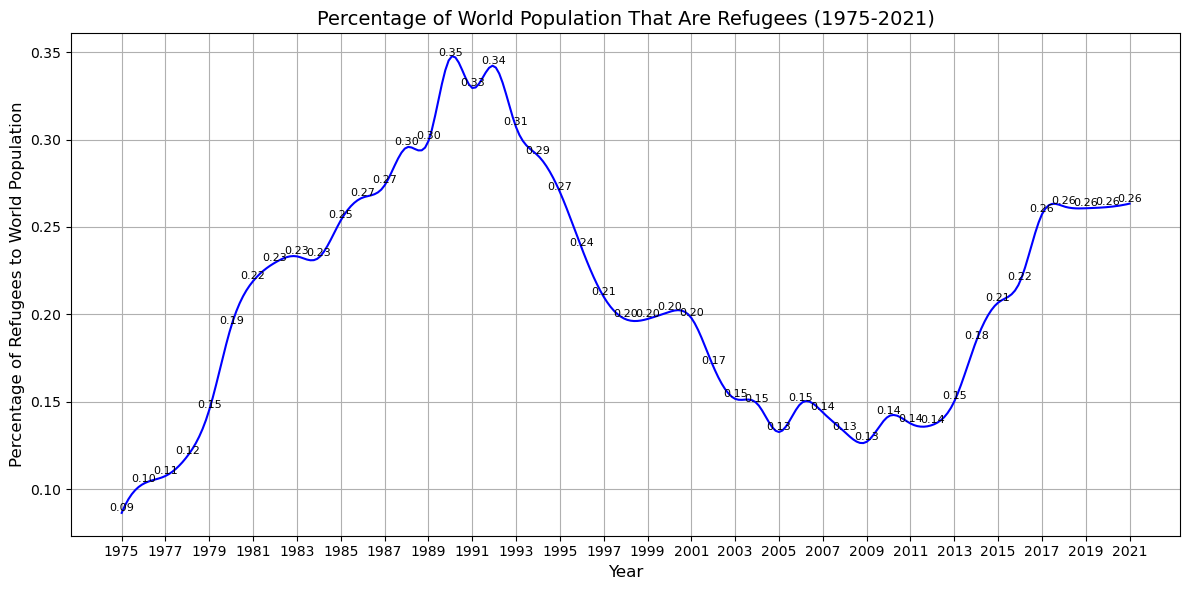

In [33]:
# Line Chart historisch
# Filter data for the period from 1975 to 2021
result_df_period = result_df[(result_df['Year'] >= 1975) & (result_df['Year'] <= 2021)]

# Calculate the total number of refugees for each year
total_refugees_per_year = result_df_period.groupby('Year')['refugees_origin'].sum()

# Estimated world population for each year (Source: United Nations)
world_population_per_year = {
    1975: 4.07e9, 1976: 4.13e9, 1977: 4.19e9, 1978: 4.25e9, 1979: 4.31e9,
    1980: 4.37e9, 1981: 4.43e9, 1982: 4.49e9, 1983: 4.55e9, 1984: 4.61e9,
    1985: 4.67e9, 1986: 4.73e9, 1987: 4.79e9, 1988: 4.85e9, 1989: 4.92e9,
    1990: 5.01e9, 1991: 5.11e9, 1992: 5.21e9, 1993: 5.31e9, 1994: 5.41e9,
    1995: 5.51e9, 1996: 5.61e9, 1997: 5.71e9, 1998: 5.81e9, 1999: 5.91e9,
    2000: 6.01e9, 2001: 6.11e9, 2002: 6.21e9, 2003: 6.31e9, 2004: 6.41e9,
    2005: 6.51e9, 2006: 6.61e9, 2007: 6.71e9, 2008: 6.81e9, 2009: 6.91e9,
    2010: 7.01e9, 2011: 7.11e9, 2012: 7.21e9, 2013: 7.31e9, 2014: 7.4e9,
    2015: 7.48e9, 2016: 7.55e9, 2017: 7.62e9, 2018: 7.68e9, 2019: 7.74e9,
    2020: 7.79e9, 2021: 7.84e9
}

# Calculate the percentage of refugees compared to the world population for each year
percentage_refugees_per_year = (total_refugees_per_year / pd.Series(world_population_per_year)) * 100

# Smooth the data using spline interpolation
x_smooth = np.linspace(percentage_refugees_per_year.index.min(), percentage_refugees_per_year.index.max(), 300)
y_smooth = make_interp_spline(percentage_refugees_per_year.index, percentage_refugees_per_year.values)(x_smooth)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth, linestyle='-', color='blue')

# Add data labels
for year, percentage in zip(percentage_refugees_per_year.index, percentage_refugees_per_year.values):
    plt.text(year, percentage, f'{percentage:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Percentage of World Population That Are Refugees (1975-2021)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Refugees to World Population', fontsize=12)
plt.grid(True)
plt.xticks(range(1975, 2022, 2))
plt.tight_layout()

3. Wie hat sich die Lebenserwartung global verändert?

In [34]:
# chart aus main

4. An welchem der folgenden Gründe sterben die meisten Menschen in Afrika

In [35]:
# pie chart
# daten zu groß?

5. Wie haben sich die Säuglingssterblich und die Geburtenrate (Primärfaktoren des HDI) historisch Entwickelt?

In [36]:
# chart aus main

6. Wie viele Jahre Schulbildung erfahren Menschen in reichen, mittleren und armen Ländern im Durchschnitt?

In [37]:
# Visualisierung aus main + Bip pro Person Visualisierung arm, mittel, reich (Definitionen nach UN nachgucken)

8. Wie haben sich die Todesfälle durch Naturktastrophen in den letzten xx Jahren verändert?

In [38]:
# Scatterplot + Regression

9. Wie glücklich sind die Menschen weltweit

In [39]:
# Bar Chart mit ausgewählten Ländern, Zusamenhang zu Bip pro Person

10. Wie viel Prozent der Kinder unter 6 wurde mindestens einmal geimpft

Fragen durch gapminder.org inspiriert
evtl vorhersagen mitintegrieren (regressionsmodelle)